### Importowanie danych

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import random
%matplotlib inline

### Stworzenie danych

In [11]:
wiek = [ random.randint(18, 65) for _ in range(100)]
zarobki = [ random.randint(x*random.randint(80,100), x*random.randint(100,140)) for x in wiek]

data =  {'Wiek': wiek, 'Zarobki': zarobki}
df = pd.DataFrame(data)
df.head()

,Wiek,Zarobki
0,64,5873
1,19,1859
2,63,5868
3,23,2817
4,29,3020


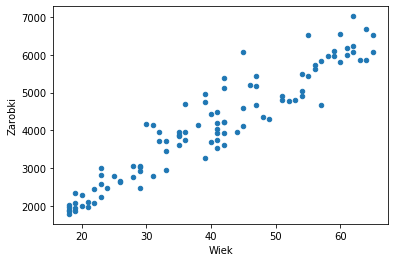

In [12]:
df.plot(kind="scatter", x="Wiek", y="Zarobki")

### Uczenie modelu

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df['Wiek'].values.reshape(-1, 1)
y = df['Zarobki']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [21]:
print(model.intercept_)
print(model.coef_)

316.69865913241256
[94.66664424]


In [22]:
print('Linear Regression R squared: %.4f' % model.score(X_test, y_test))


Linear Regression R squared: 0.8431


In [23]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: %.2f ' % rmse)

RMSE: 524.19 


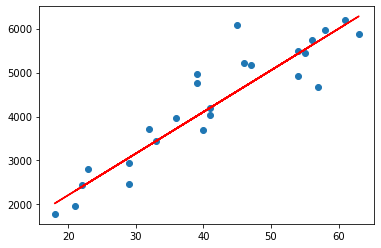

In [24]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red')